<a href="https://colab.research.google.com/github/Vigneshprabhu078/Data-Collection-and-Pre_Processing/blob/main/Data_Collection_and_Pre_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Import Data From Kaggle API**

API - Application Programming Interface

In [1]:
#installing Kaggle library

!pip install kaggle

**Upload your kaggle.json file**

In [2]:
#configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


###**Importing the dataset**

In [3]:
#Api to fetch The dataset
!kaggle competitions download -c titanic

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 398, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [4]:
#extracting Zip file
from zipfile import ZipFile
file_name = "titanic.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Extracted")

Extracted


##**How To Handle Missing Values**

---



*   Imputation
*   Dropping



In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:

PD=pd.read_csv('/content/Placement_Dataset.csv')
PD.head() #NAN not an number


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [7]:
PD.shape

(215, 15)

In [8]:
PD.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

**Central Tendencies:**

---


1.   Mean  - Average
2.   Median -Middle

3.   Mode -Repeated Values







<ipython-input-9-2f2773ec621a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(PD['salary'])


<Axes: xlabel='salary', ylabel='Density'>

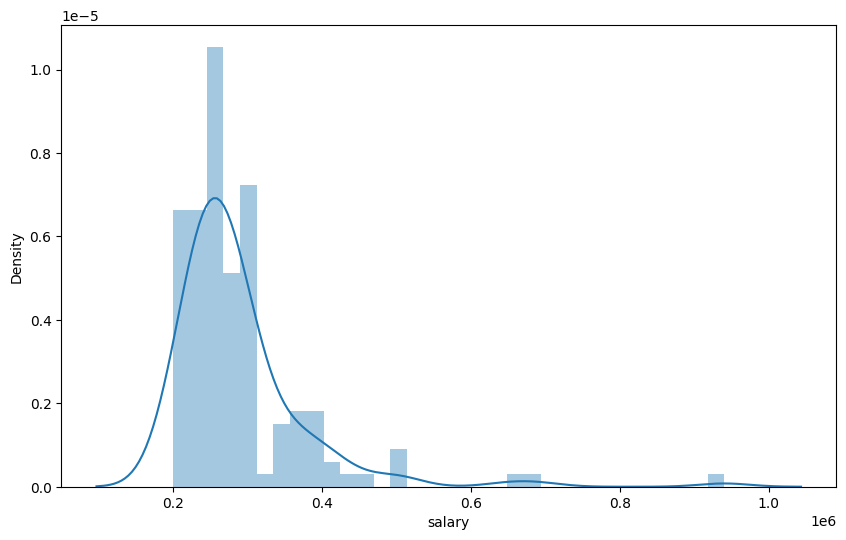

In [9]:
#analyse the distribution of data in the salary
fig=plt.figure(figsize=(10,6))
sns.distplot(PD['salary'])

**Replace missing values with median value**

In [10]:
PD['salary'].fillna(pd.DataFrame.median(PD['salary']),inplace=True)

In [11]:
#filling with median values
#PD['salary'].fillna(pd.DataFrame.mean(PD['salary']),inplace=True)

### **Dropping**

In [12]:
salary=pd.read_csv('/content/Placement_Dataset.csv')
salary.head()
salary.shape

(215, 15)

In [13]:
salary=salary.dropna(how='any')
salary.shape

(148, 15)